<h1 style="text-align: center;">Frequency Response</h1>
<p style="text-align: center;">Lab 10</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with frequency response tools and Bode plots using Python.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Bode plot for **Part 1, Task 1**.  
[ ] Bode plot for **Part 1, Task 2**.  
[ ] Bode plot for **Part 1, Task 3**.  
##### Part 2  
[ ] Time-domain plot for **Part 2, Task 1**.  
[ ] Code for **Part 2, Task 2**.  
[ ] Code for **Part 2, Task 3**. 
[ ] Time-domain plot for **Part 2, Task 4**.

### 3. Part 1
##### 3.0.1 Example Code
The following code shows how to use the **control.TransferFunction()** and **control.bode()** methods. Consult the documentation for further usage if necessary. 

In [ ]:
""" This code is non-functioning, it serves to show syntax for the control.TransferFunction() and control.bode() functions. """

import control as con #This package is not included in Anaconda and should have been installed in lab 0

sys = con.TransferFunction(num, den) #S-domain numerator and denominator similar to scipy.signal functions we have used before
_ = con.bode(sys, omega, dB=True, Hz=True, deg=True, Plot=True) #Use _ to suppress the output, this will still plot because of the Plot=True parameter

##### 3.1 Purpose  
Develop a frequency response from the RLC circuit from **Prelab 10** and present the model using Bode plots.  

##### 3.2 Tasks  
Consider the RLC circuit from **Prelab 10**, which has the values R = 1 k $\Omega$, L = 27 mH, C = 100 nF and has the transfer function, $$H(s) = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}.$$  
1. Use the expressions found in the prelab to plot the magnitude (in dB) and the phase (in degrees) in Python for the RLC transfer function $H(s)$ from $10^3 \ \frac{rad}{s} \le \omega \le 10^6 \ \frac{rad}{s}$ using an adequately small step size. Use **matplotlib.pyplot.semilogx()** instead of **matplotlib.pyplot.plot()** to plot the x-axis on a logarithmic scale. *Note: You may need to adjust part of the phase plot.*

In [2]:
#Insert all necessary imports here
import scipy.signal as sig
import scipy.fftpack as sfft
import matplotlib.pyplot as plt
import numpy as np
import control as con

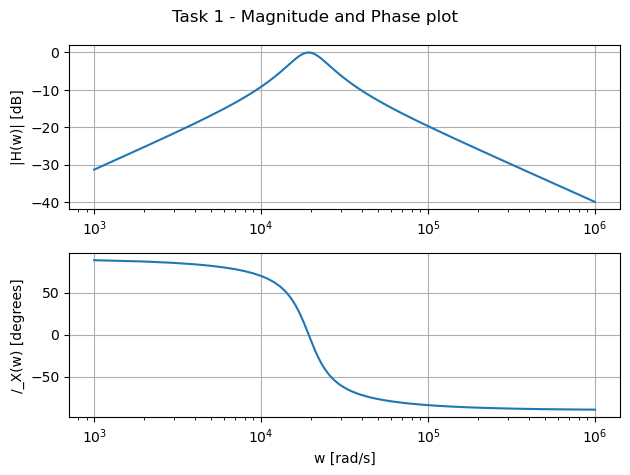

In [3]:
#Insert code for Part 1 Task 1 here
steps = 1e3
w = np.arange(10e2, 10e5 + steps, steps)

R = 1e3
L = 27e-3
C = 100e-9

magH = (w / (R*C)) / np.sqrt(w**4 + ((1 / (R*C))**2 - 2 / (L*C)) * w**2 + (1 / (L*C))**2)
magHdB = 20 * np.log10(magH)
angH = np.pi/2 - np.arctan2(w / (R*C), -w**2 + 1 / (L*C))
angHdeg = np.rad2deg(angH)

plt.figure()
plt.suptitle("Task 1 - Magnitude and Phase plot")

plt.subplot(2, 1, 1)
plt.semilogx(w, magHdB)
plt.grid()
plt.ylabel("|H(w)| [dB]")

plt.subplot(2, 1, 2)
plt.semilogx(w, angHdeg)
plt.grid()
plt.ylabel("/_X(w) [degrees]")
plt.xlabel("w [rad/s]")

plt.tight_layout()
plt.show()


2. Use **scipy.signal.bode()** to plot the magnitude and phase frequency response for the RLC transfer function. Check that the plots generated using your hand-derived magnitude and phase match the Bode plot. *Note: You may need to adjust part of the phase by $\pi$ radians to match your results in this task.*

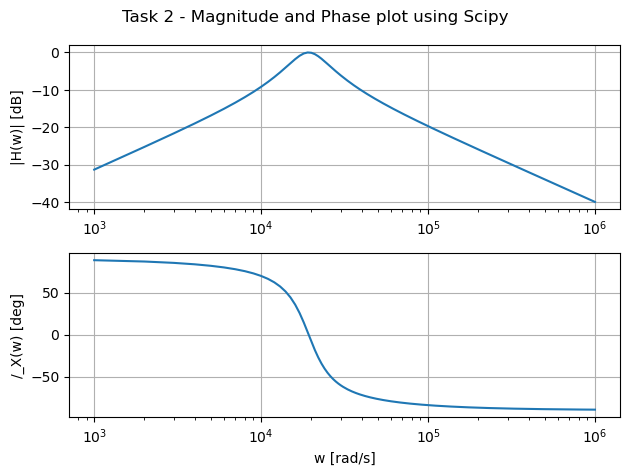

In [29]:
#Insert code for Part 1 Task 2 here
steps = 1e3
w = np.arange(10e2, 10e5 + steps, steps)

num = [1/(R*C), 1]
den = [1, 1/(R*C), 1/(L*C)]

sys = sig.TransferFunction(num, den)
w, magHdB, angHdeg = sig.bode(sys, w)

plt.figure()
plt.suptitle("Task 2 - Magnitude and Phase plot using Scipy")

plt.subplot(2, 1, 1)
plt.semilogx(w, magHdB)
plt.grid()
plt.ylabel("|H(w)| [dB]")

plt.subplot(2, 1, 2)
plt.semilogx(w, angHdeg)
plt.grid()


plt.tight_layout()
plt.show()

3. In most engineering situations, it may be desirable to find the frequency response with respect to Hz, not rad/s. We may also want to set the specific range of frequencies over which to plot the frequency. Print the transfer function after using **control.TransferFunction()**. Plot the frequency response of the system in Hz using **control.bode()** and following the example code given earlier in the lab. 


       1e+04 s + 1
-------------------------
s^2 + 1e+04 s + 3.704e+08



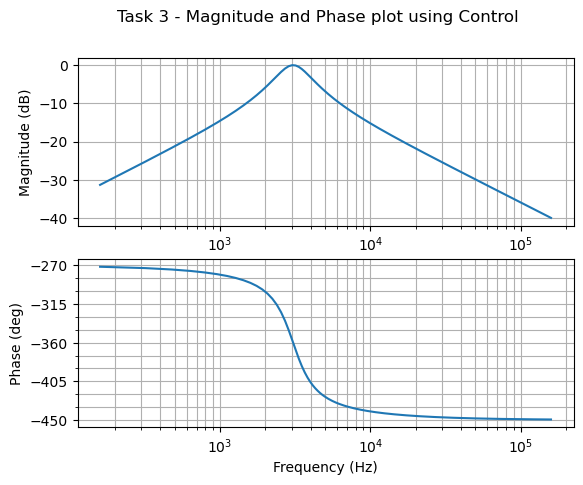

In [8]:
#Insert code for Part 1 Task 3 here
num = [1 / (R * C), 1]
den = [1, 1 / (R * C), 1 / (L * C)]

steps = 1e3
w = np.arange(10e2, 10e5 + steps, steps)

sys = con.TransferFunction(num, den)
print(sys)
_ = con.bode(sys, w, dB=True, Hz=True, deg=True, Plot=True)
plt.suptitle("Task 3 - Magnitude and Phase plot using Control")
plt.show()

### 4. Part 2  
##### 4.1 Purpose
Use the frequency response model developed in **Part 1** as a filter for a multi-band input signal.

##### 4.2 Tasks  
1. Plot the signal, $$x(t) = \cos(2\pi\cdot100t) + \cos(2\pi\cdot3024t) + \sin(2\pi\cdot50000t)$$ from $0 \le t \le 0.01$ s, setting the sampling frequency high enough to capture all three frequencies and the step size of $\frac{1}{f_s}$.

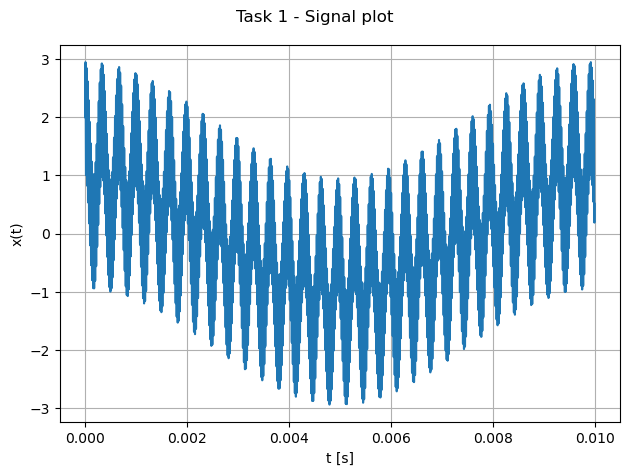

In [28]:
#Insert code for Part 2 Task 1 here
f_s = 500000
steps = 1/f_s
t = np.arange(0, 0.01, steps)

x = np.cos(2*np.pi*100*t) + np.cos(2*np.pi*3024*t) + np.sin(2*np.pi*50000*t)

plt.figure()
plt.suptitle("Task 1 - Signal plot")

plt.plot(t,x)
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. To pass the input signal $x(t)$ through the RLC circuit, the transfer function must be converter into its z-domain equivalent. This can be done automatically by Python using **scipy.signal.bilinear()**. *Note: You will be responsible for looking up the documentation on how to use this function.*

In [25]:
#Insert code for Part 2 Task 2 here
num = [1 / (R * C), 1]
den = [1, 1 / (R * C), 1 / (L * C)]

numz, denz = sig.bilinear(num, den, f_s)

3. Use **scipy.signal.lfilter()** to pass the input signal through the filter. Since your output will be a large array, there is no need to print the output.

In [26]:
#Insert code for Part 2 Task 3 here
y = sig.lfilter(numz, denz, x)

4. Plot the output signal $y(t)$ over the same time period as **Part 2 Task 1**.

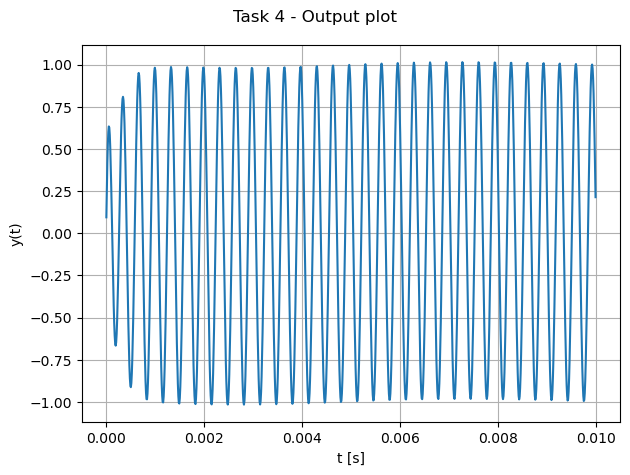

In [27]:
#Insert code for Part 2 Task 4 here
plt.figure()
plt.suptitle("Task 4 - Output plot")

plt.plot(t,y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 5. Questions
1. Explain how the filter and filtered output in **Part 2** makes sense given the Bode plots from **Part 1**. Discuss how the filter modifies specific frequency bands, in Hz. 
>The filter modifies specific frequency bands in the input signal based on its magnitude and phase responses as shown in the Bode plots, resulting in corresponding attenuation or amplification and phase shifts in the filtered output.
2. Discuss the purpose and workings of **scipy.signal.bilinear()** and **scipy.signal.lfilter()**. 
>**scipy.signal.bilinear()** is used to convert continuous-time filters into discrete-time equivalents through bilinear transformation, preserving frequency response, while **scipy.signal.lfilter()** applies digital filters to data sequences, performing linear convolution to produce filtered outputs in time domain.
3. What happens if you use a different sampling frequency in **scipy.signal.bilinear()** than you used for the time-domain signal?
>Using a different sampling frequency in scipy.signal.bilinear() than the one used for the time-domain signal can lead to frequency warping, incorrect filter characteristics, and sampling rate mismatch, potentially causing errors in the filtered output.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>NA